In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
students = pd.read_csv("./students_sleep_dataset.csv")
students.head()

,student_name,sleep_hours,fatigue_level,sleep_in_class
0,Alex,8.0,2,0
1,John,7.5,3,0
2,Mary,6.8,1,0
3,Anna,9.0,4,0
4,Dmytro,7.2,2,0


In [3]:
students.shape

(12, 4)

In [4]:
students.columns

Index(['student_name', 'sleep_hours', 'fatigue_level', 'sleep_in_class'], dtype='object')

In [5]:
students["sleep_in_class"] = students["sleep_in_class"].map(lambda x: 1 if x == 1 else -1)
students

,student_name,sleep_hours,fatigue_level,sleep_in_class
0,Alex,8.0,2,-1
1,John,7.5,3,-1
2,Mary,6.8,1,-1
3,Anna,9.0,4,-1
4,Dmytro,7.2,2,-1
5,Kate,8.5,3,-1
6,Olga,3.5,8,1
7,Andrew,4.2,9,1
8,Marta,5.0,7,1
9,Denys,2.8,10,1


<Axes: xlabel='sleep_hours', ylabel='fatigue_level'>

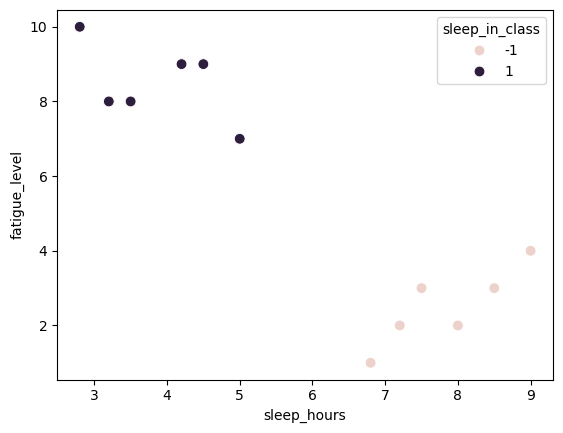

In [6]:
sns.scatterplot(data=students, x="sleep_hours", y="fatigue_level", hue="sleep_in_class", s=60)

In [7]:
sleepy_students = students[students["sleep_in_class"] == 1]
print(sleepy_students.head())

not_sleepy_students = students[students["sleep_in_class"] == -1]
print(not_sleepy_students.head())

   student_name  sleep_hours  fatigue_level  sleep_in_class
6          Olga          3.5              8               1
7        Andrew          4.2              9               1
8         Marta          5.0              7               1
9         Denys          2.8             10               1
10        Iryna          4.5              9               1
  student_name  sleep_hours  fatigue_level  sleep_in_class
0         Alex          8.0              2              -1
1         John          7.5              3              -1
2         Mary          6.8              1              -1
3         Anna          9.0              4              -1
4       Dmytro          7.2              2              -1


In [8]:
distances = pd.DataFrame(index=not_sleepy_students["student_name"].values, columns=sleepy_students["student_name"])
distances

student_name,Olga,Andrew,Marta,Denys,Iryna,Sofia
Alex,NaN,NaN,NaN,NaN,NaN,NaN
John,NaN,NaN,NaN,NaN,NaN,NaN
Mary,NaN,NaN,NaN,NaN,NaN,NaN
Anna,NaN,NaN,NaN,NaN,NaN,NaN
Dmytro,NaN,NaN,NaN,NaN,NaN,NaN
Kate,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def euclidian_distance(point_1, point_2):
  return np.sqrt((point_2[0] - point_1[0])**2 + (point_2[1] - point_1[1])**2)

In [10]:
not_sleepy_labels = distances.index.to_list()
sleepy_labels = sleepy_students["student_name"].to_list()

for i, not_sleepy_label in enumerate(not_sleepy_labels):
    for j, sleepy_label in enumerate(sleepy_labels):
      distances.iloc[i, j] = euclidian_distance(
        not_sleepy_students.iloc[i][["sleep_hours", "fatigue_level"]].to_list(),
        sleepy_students.iloc[j][["sleep_hours", "fatigue_level"]].to_list()
        )

In [11]:
distances

student_name,Olga,Andrew,Marta,Denys,Iryna,Sofia
Alex,7.5,7.964923,5.830952,9.541488,7.826238,7.683749
John,6.403124,6.847627,4.716991,8.431489,6.708204,6.594695
Mary,7.738863,8.411896,6.264184,9.848858,8.324062,7.871467
Anna,6.800735,6.931089,5.0,8.627862,6.726812,7.045566
Dmytro,7.049113,7.615773,5.4626,9.13017,7.502666,7.211103
Kate,7.071068,7.381734,5.315073,9.027181,7.211103,7.286288


In [12]:
min_distance = [None, None, float('inf')]

for i, nsl_st in enumerate(distances.index):
    for j, sl_st in enumerate(distances.columns):
        value = distances.iloc[i, j]
        if value < min_distance[2]:
            min_distance = [nsl_st, sl_st, value]

min_distance

['John', 'Marta', 4.716990566028302]

In [13]:
support_v_1 = students[students["student_name"] == min_distance[0]]
support_v_2 = students[students["student_name"] == min_distance[1]]

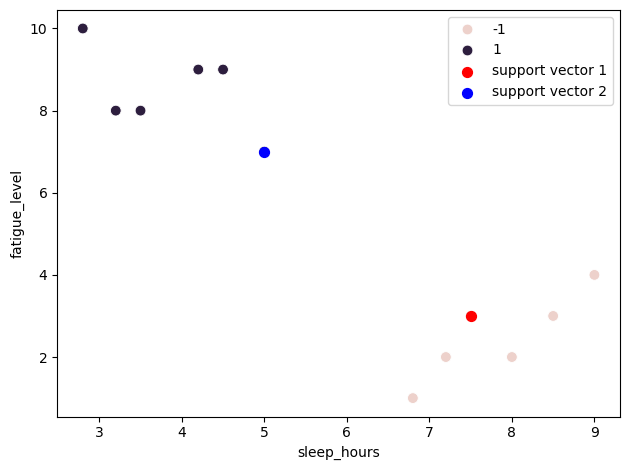

In [14]:
sns.scatterplot(data=students, x="sleep_hours", y="fatigue_level", hue="sleep_in_class", s=60)
plt.scatter(support_v_1["sleep_hours"], support_v_1["fatigue_level"], s=50, color="red", label="support vector 1")
plt.scatter(support_v_2["sleep_hours"], support_v_2["fatigue_level"], s=50 ,color="blue", label="support vector 2")
plt.legend()
plt.tight_layout()

In [15]:
x1 = np.array([support_v_1["sleep_hours"].values[0], 
 support_v_1["fatigue_level"].values[0]])

x2 = np.array([support_v_2["sleep_hours"].values[0], 
 support_v_2["fatigue_level"].values[0]])

print(x1)
print(x2)

[7.5 3. ]
[5. 7.]


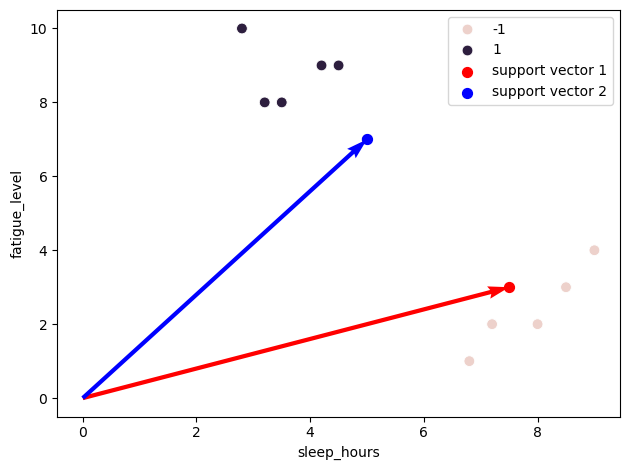

In [16]:
sns.scatterplot(data=students, x="sleep_hours", y="fatigue_level", hue="sleep_in_class", s=60)
plt.scatter(support_v_1["sleep_hours"], support_v_1["fatigue_level"], s=50, color="red", label="support vector 1")
plt.scatter(support_v_2["sleep_hours"], support_v_2["fatigue_level"], s=50 ,color="blue", label="support vector 2")
plt.legend()
plt.tight_layout()

plt.quiver(0, 0, x1[0], x1[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0, 0, x2[0], x2[1], angles="xy", scale_units="xy", scale=1, color="blue")

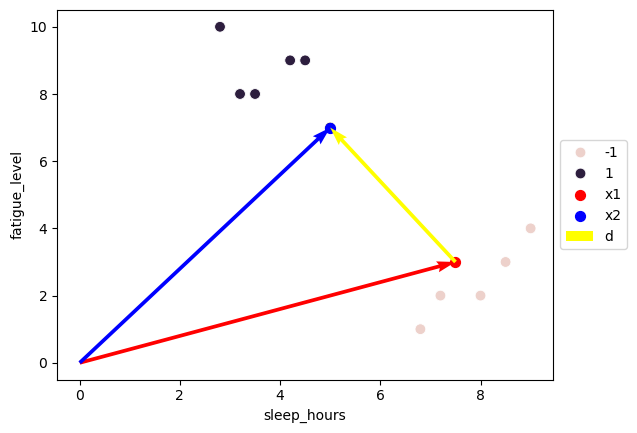

In [ ]:
sns.scatterplot(data=students, x="sleep_hours", y="fatigue_level", hue="sleep_in_class", s=60)
plt.scatter(support_v_1["sleep_hours"], support_v_1["fatigue_level"], 
            s=50, color="red", label="x1")
plt.scatter(support_v_2["sleep_hours"], support_v_2["fatigue_level"], 
            s=50, color="blue", label="x2")
plt.quiver(0, 0, x1[0], x1[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0, 0, x2[0], x2[1], angles="xy", scale_units="xy", scale=1, color="blue")

d = x2 - x1
plt.quiver(x1[0], x1[1], d[0], d[1], angles="xy", scale_units="xy", scale=1, color="yellow", label="d")

plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

a =  0.0898876404494382
w =  [-0.2247191   0.35955056]


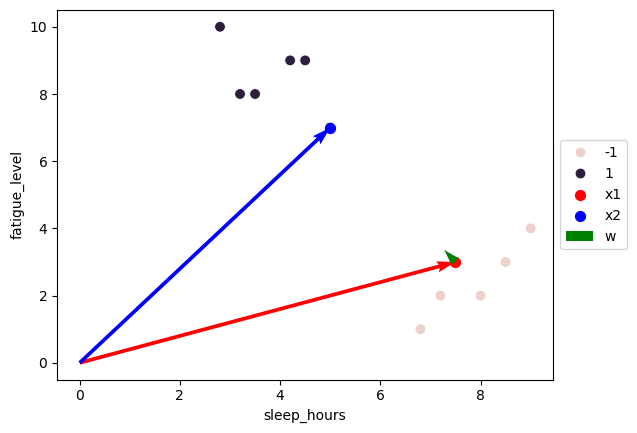

In [30]:
sns.scatterplot(data=students, x="sleep_hours", y="fatigue_level", hue="sleep_in_class", s=60)
plt.scatter(support_v_1["sleep_hours"], support_v_1["fatigue_level"], 
            s=50, color="red", label="x1")
plt.scatter(support_v_2["sleep_hours"], support_v_2["fatigue_level"], 
            s=50, color="blue", label="x2")
plt.quiver(0, 0, x1[0], x1[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0, 0, x2[0], x2[1], angles="xy", scale_units="xy", scale=1, color="blue")

a = 2 / np.dot(d, d)
print("a = ", a)
w = a * d
print("w = ", w)
plt.quiver(x1[0], x1[1], w[0], w[1], angles="xy", scale_units="xy", scale=1, color="green", label="w")

plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

d =  [-2.5  4. ]
a =  0.0898876404494382
w =  [-0.2247191   0.35955056]
b =  -0.3932584269662922


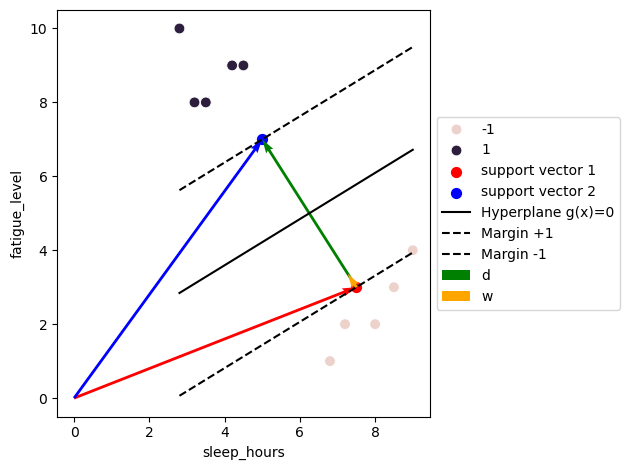

In [31]:
sns.scatterplot(data=students, x="sleep_hours", y="fatigue_level", hue="sleep_in_class", s=60)
plt.scatter(support_v_1["sleep_hours"], support_v_1["fatigue_level"], 
            s=50, color="red", label="support vector 1")
plt.scatter(support_v_2["sleep_hours"], support_v_2["fatigue_level"], 
            s=50, color="blue", label="support vector 2")
plt.quiver(0, 0, x1[0], x1[1], angles="xy", scale_units="xy", scale=1, color="red")
plt.quiver(0, 0, x2[0], x2[1], angles="xy", scale_units="xy", scale=1, color="blue")

b = -1 - np.dot(w, x1)

print("d = ", d)
print("a = ", a)
print("w = ", w)
print("b = ", b)

x_vals = np.linspace(students["sleep_hours"].min(), students["sleep_hours"].max(), 100)

# гіперплощина g(x)=0
y_hyperplane = -(w[0] * x_vals + b) / w[1]
# межі маржі g(x)=+1 та g(x)=-1
y_margin_plus = -(w[0] * x_vals + b - 1) / w[1]
y_margin_minus = -(w[0] * x_vals + b + 1) / w[1]

plt.plot(x_vals, y_hyperplane, 'k-', label='Hyperplane g(x)=0')
plt.plot(x_vals, y_margin_plus, 'k--', label='Margin +1')
plt.plot(x_vals, y_margin_minus, 'k--', label='Margin -1')

# --- Вектори d і w від точки x1 ---
plt.quiver(x1[0], x1[1], d[0], d[1], angles="xy", scale_units="xy", 
           scale=1, color="green", label="d")
plt.quiver(x1[0], x1[1], w[0], w[1], angles="xy", scale_units="xy", 
           scale=1, color="orange", label="w")

plt.xlabel("sleep_hours")
plt.ylabel("fatigue_level")
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [47]:
def predict(x, w, b):
  return 1 if np.dot(x, w) + b > 0 else -1

In [49]:
w =  [-0.2247191, 0.35955056]
b =  -0.3932584269662922
x_pred = [8, 1]

predict(x_pred , w, b)

-1

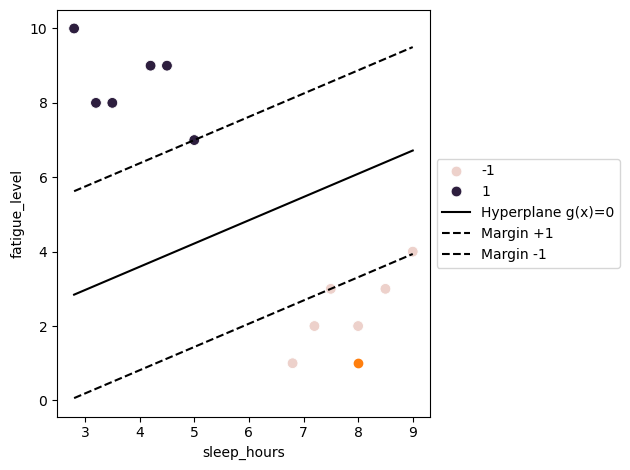

In [53]:
sns.scatterplot(data=students, x="sleep_hours", y="fatigue_level", hue="sleep_in_class", s=60)
plt.plot(x_vals, y_hyperplane, 'k-', label='Hyperplane g(x)=0')
plt.plot(x_vals, y_margin_plus, 'k--', label='Margin +1')
plt.plot(x_vals, y_margin_minus, 'k--', label='Margin -1')

x_pred = [8, 1]
plt.scatter(x_pred[0], x_pred[1])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
sns.scatterplot(data=students, x="sleep_hours", y="fatigue_level", hue="sleep_in_class", s=60)
plt.plot(x_vals, y_hyperplane, 'k-', label='Hyperplane g(x)=0')
plt.plot(x_vals, y_margin_plus, 'k--', label='Margin +1')
plt.plot(x_vals, y_margin_minus, 'k--', label='Margin -1')

x_pred = [8, 1]
plt.scatter(x_pred[0], x_pred[1], color="")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()